<a href="https://colab.research.google.com/github/kimheeyunn/machinelearning/blob/main/KMEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-10-12 07:13:01--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-10-12 07:13:01--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-10-12 07:13:02--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

fruits = np.load('fruits_300.npy') # 과일 사진 불러오기
fruits_2d = fruits.reshape(-1,10000) # (300,100,100) 배열을 (300, 10000)으로 형태 변환
fruits_2d.shape

(300, 10000)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

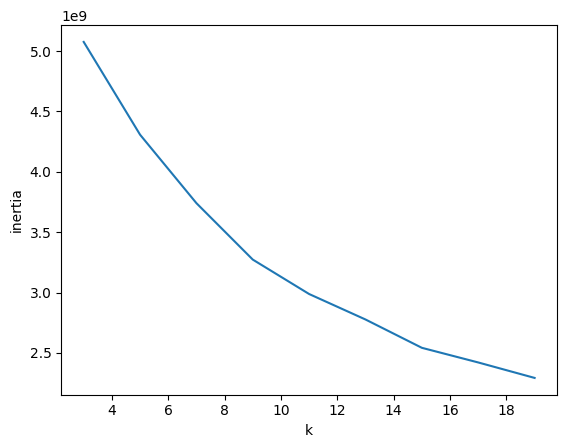

In [3]:
inertia = []

for k in range(3,20,2):
  km = KMeans(n_clusters=k, random_state=100)
  km.fit(fruits_2d)
  inertia.append(km.inertia_) # inertia : 클러스터 중심에서 클러스터 내 샘플 사이의 거리의 제곱의 합

plt.plot(range(3,20,2),inertia) # 5, 7, 9, 11, 15에서 그래프가 꺾이는 것을 확인
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [4]:
km = KMeans(n_clusters=3,random_state = 42, n_init=1) # 군집개수 3개, centroid 1번 초기화를 설정한 KMeans 모델 생성 및 학습
km.fit(fruits_2d)

KMeans(n_clusters=3, n_init=1, random_state=42)

In [5]:
def draw_fruits(arr,ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows,cols,figsize=(cols*ratio, rows*ratio),squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i * 10 + j < n:
        axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
      axs[i,j].axis('off')

  plt.show()

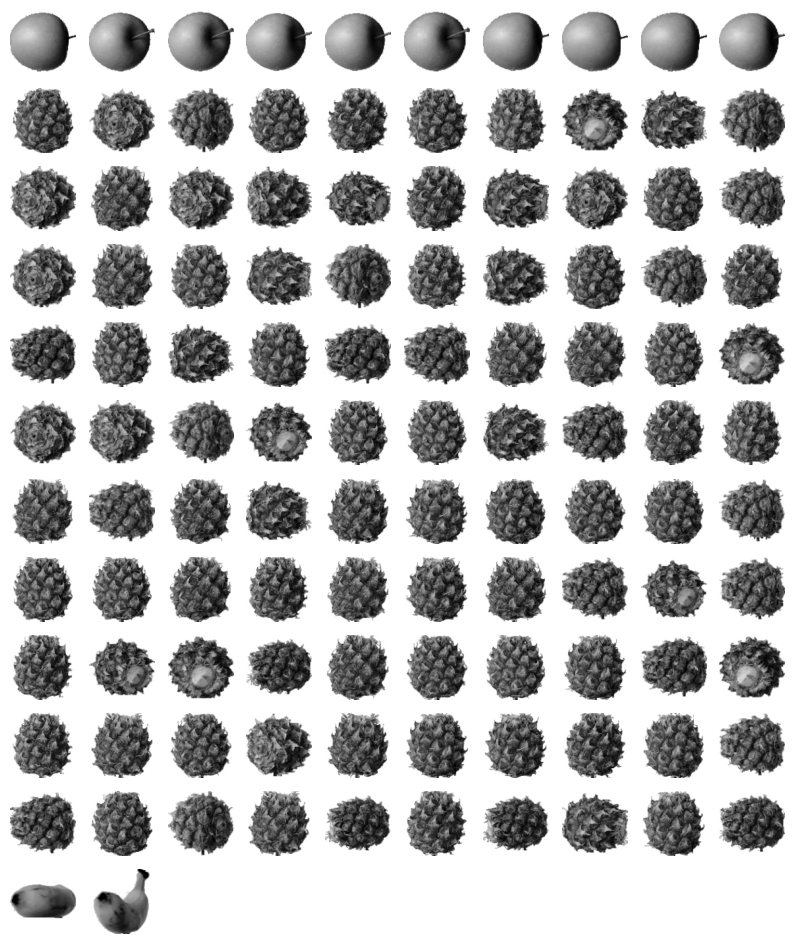

0


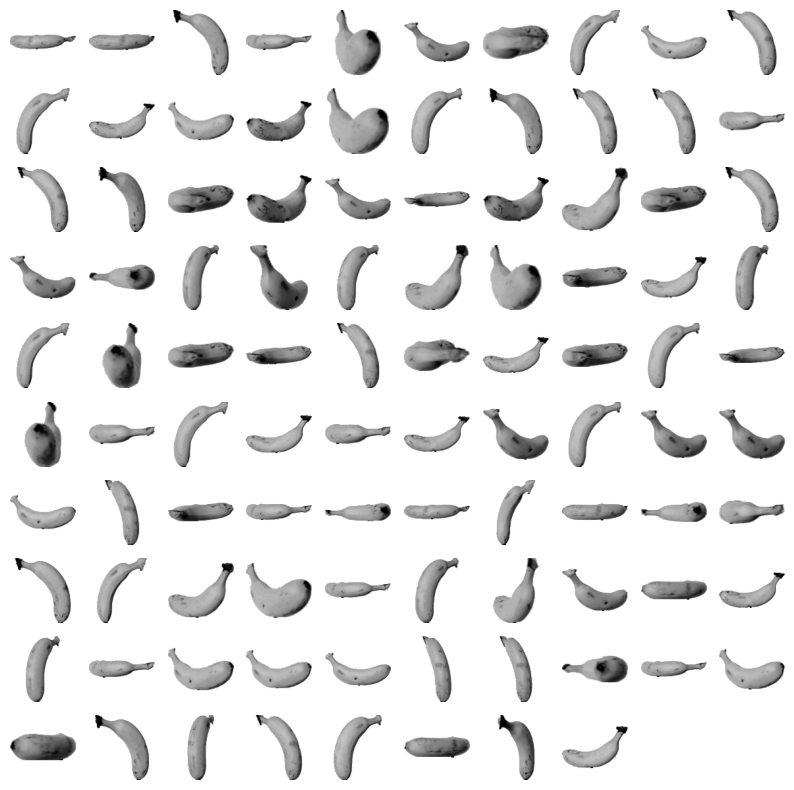

1


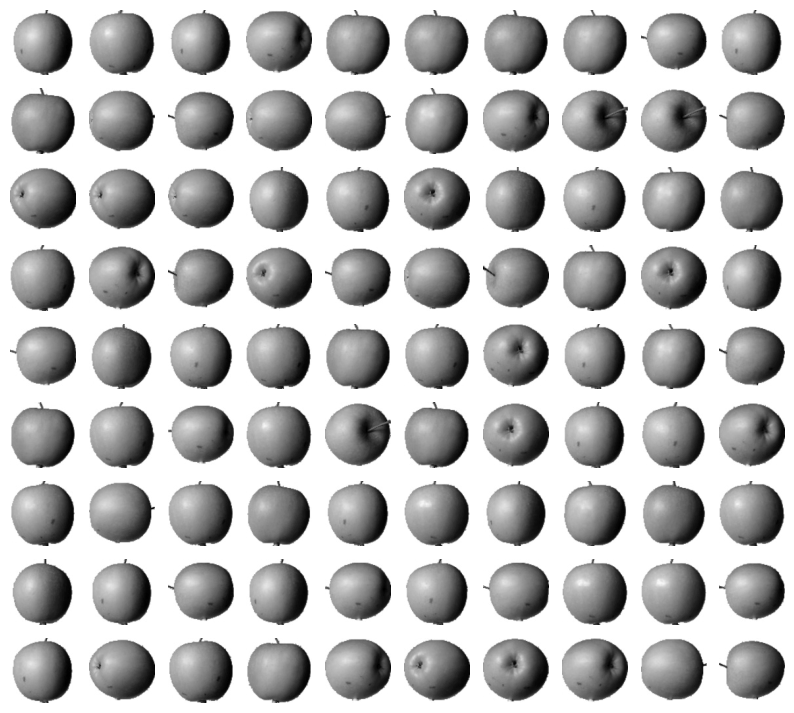

2


In [6]:
for j in range(3):
    draw_fruits(fruits[km.labels_ == j]) # km.labels_의 값이 0,1,2인 순서대로 fruits 내 사진 출력
    print(j)

# 평가지표

In [7]:
print('혼동행렬')
print(np.array([[100,0,0],[2,98,0],[10,0,90]]))

ytest = [0]*100 + [1]*100 + [2]*100
pred = [0]*100 + [1]*98 + [2]

accuracy = 288 / 300 # 정확도
precision = (100/112 + 1 + 1) / 3 # 정밀도
recall = (1 + 98/100 + 90/100) / 3  # 재현율
f1 = 2 / ((1/precision) + (1/recall))

print('')
print('정확도 : ', accuracy)
print('정밀도 : ', precision)
print('재현율 : ', recall)
print('F1-score : ', f1)

혼동행렬
[[100   0   0]
 [  2  98   0]
 [ 10   0  90]]

정확도 :  0.96
정밀도 :  0.9642857142857143
재현율 :  0.96
F1-score :  0.9621380846325167


In [8]:
km.cluster_centers_.shape

(3, 10000)

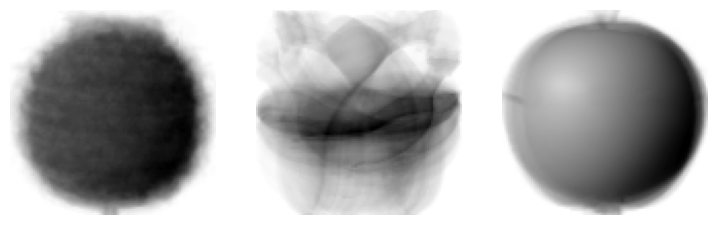

In [9]:
draw_fruits(km.cluster_centers_.reshape(-1,100,100),ratio=3) # 각 클러스터의 중심을 시각화

In [10]:
print(km.transform(fruits_2d[100:101])) # 각 클러스터의 중심에서 해당 데이터가 얼마나 떨어져 있는지 출력
print(km.predict(fruits_2d[100:101])) # fruits[100]의 예측값을 출력

[[3400.24197319 8837.37750892 5279.33763699]]
[0]


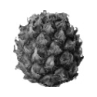

4


In [11]:
draw_fruits(fruits[100:101]) # fruits[100]의 값을 시각화
print(km.n_iter_) # 클러스터 중심을 옮기면서 최적의 중심을 찾는 과정을 몇 번 수행하였는지

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

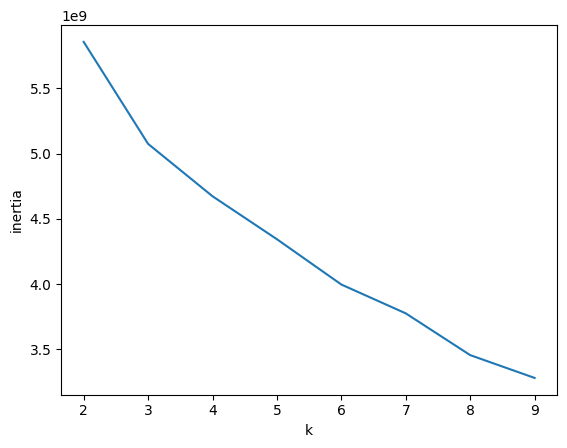

In [12]:
inertia = []

for k in range(2,10):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)

plt.plot(range(2,10),inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

응용


In [13]:
km = KMeans(n_clusters=11,random_state = 42, n_init = 8) # 클러스터의 개수를 11개로 설정, 새롭게 중심을 찾는 과정을 8번 수행하는 모델 생성
km.fit(fruits_2d)

KMeans(n_clusters=11, n_init=8, random_state=42)

In [14]:
# 11개의 클러스터를 다시 3개의 클러스터로 합침
x1 = [0 for i in list(km.labels_) if i in [1, 2, 9]]
x2 = [1 for i in list(km.labels_) if i in [5, 7, 8]]
x3 = [2 for i in list(km.labels_) if i in [0, 3, 4, 6, 10]]

result = x1 + x2 + x3
result = np.array(result)
result.shape

(300,)

In [15]:
km.labels_.shape

(300,)

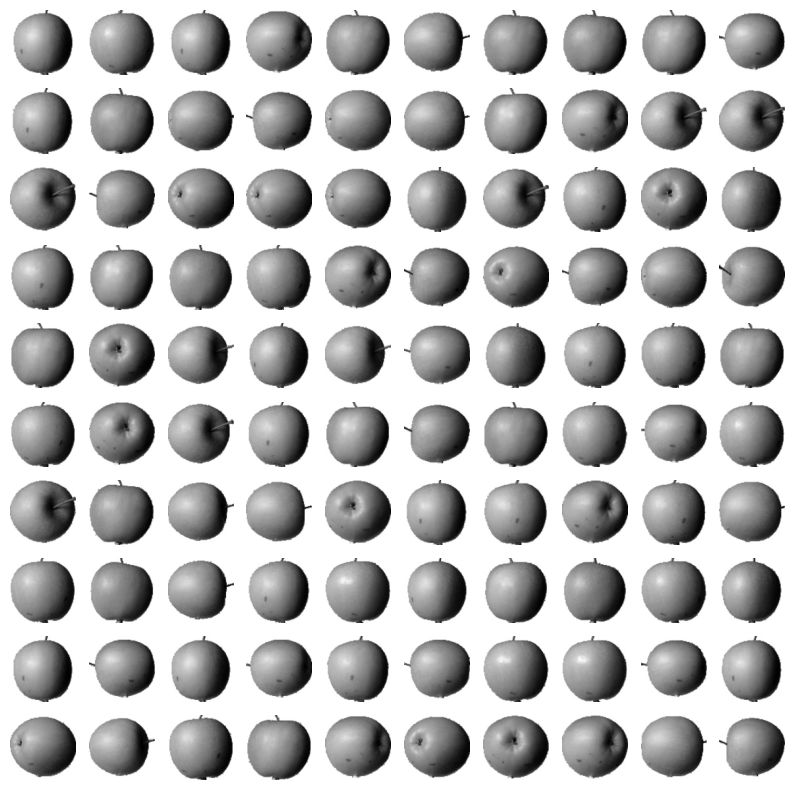

0


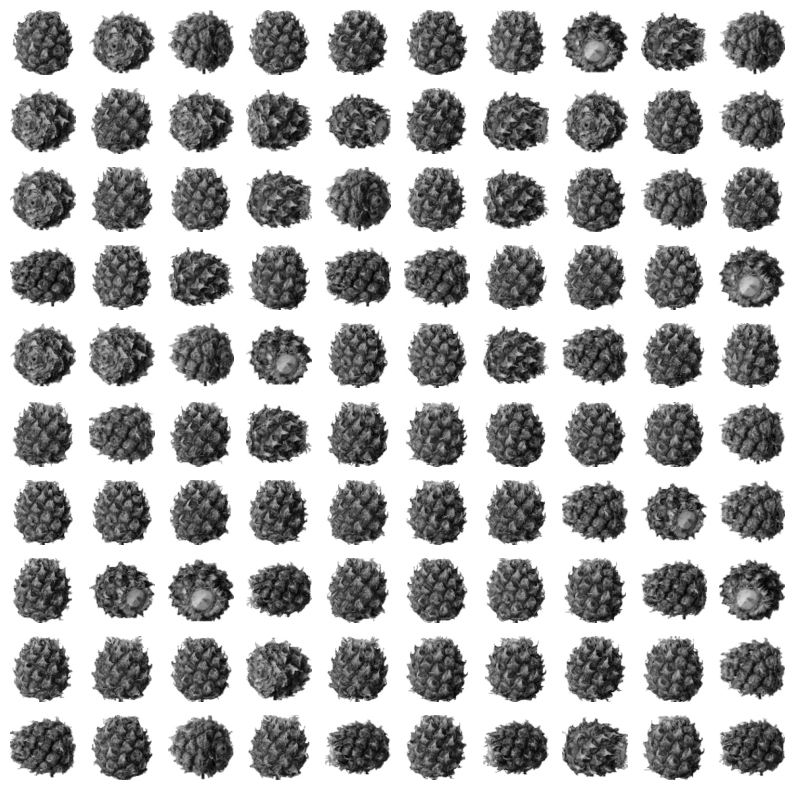

1


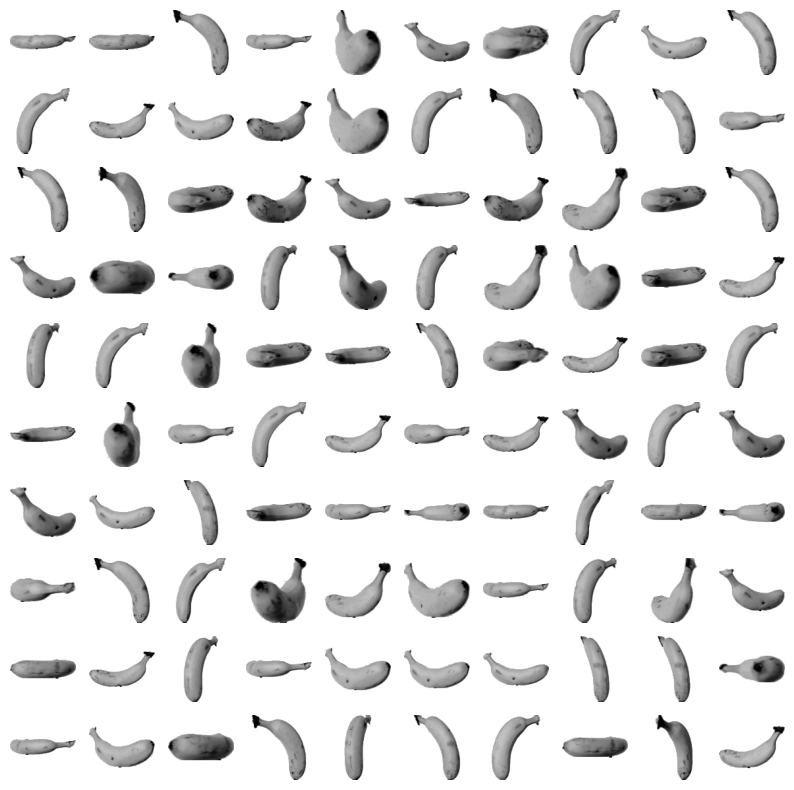

2


In [16]:
for j in range(3):
    draw_fruits(fruits[result == j])
    print(j)